# RNN variants

In [1]:
import os
import tensorflow as tf
import numpy as np
import random
SEED = 42
os.environ['PYTHONHASHSEED'] = str(SEED)
os.environ['TF_DETERMINISTIC_OPS'] = '1'
tf.random.set_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)

2023-07-27 11:17:04.757746: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-27 11:17:04.804032: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-27 11:17:04.804822: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-27 11:17:05.486234: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## 1) LSTM

In [4]:
# imdb데이터 로드
from tensorflow.keras.datasets import imdb
max_features = 10000 # 빈도가 높은 10000개의 단어만 사용
(X_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
# X(대문자) : 2차원 배열 / x(소문자) : 1차원 배열로 보통 표현

In [5]:
X_train[:2]

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [6]:
# 패딩
from tensorflow.keras.preprocessing import sequence
max_len = 500
x_train = sequence.pad_sequences(X_train, maxlen=max_len, padding = 'post')
x_test = sequence.pad_sequences(x_test, maxlen=max_len, padding = 'post')

In [7]:
from tensorflow.keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [8]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [10]:
#simple LSTM
tf.random.set_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)

model1 = models.Sequential()
model1.add(layers.Embedding(max_features+1, 32))
model1.add(layers.LSTM(32))
model1.add(layers.Dense(16, activation='tanh'))
model1.add(layers.Dense(2, activation='softmax'))
model1.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          320032    
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 16)                528       
                                                                 
 dense_1 (Dense)             (None, 2)                 34        
                                                                 
Total params: 328914 (1.25 MB)
Trainable params: 328914 (1.25 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
# stacked LSTM
tf.random.set_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)

model2 = models.Sequential()
model2.add(layers.Embedding(max_features+1, 32))
model2.add(layers.LSTM(32, return_sequences=True))
model2.add(layers.LSTM(16))
model2.add(layers.Dense(16, activation='tanh'))
model2.add(layers.Dense(2, activation='softmax'))
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 32)          320032    
                                                                 
 lstm_2 (LSTM)               (None, None, 32)          8320      
                                                                 
 lstm_3 (LSTM)               (None, 16)                3136      
                                                                 
 dense_2 (Dense)             (None, 16)                272       
                                                                 
 dense_3 (Dense)             (None, 2)                 34        
                                                                 
Total params: 331794 (1.27 MB)
Trainable params: 331794 (1.27 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
# bidirectional LSTM
tf.random.set_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)

model3 = models.Sequential()
model3.add(layers.Embedding(max_features+1, 32))
model3.add(layers.Bidirectional(layers.LSTM(32, return_sequences = True)))
model3.add(layers.LSTM(16))
model3.add(layers.Dense(16, activation='tanh'))
model3.add(layers.Dense(2, activation='softmax'))
model3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 32)          320032    
                                                                 
 bidirectional (Bidirection  (None, None, 64)          16640     
 al)                                                             
                                                                 
 lstm_5 (LSTM)               (None, 16)                5184      
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dense_5 (Dense)             (None, 2)                 34        
                                                                 
Total params: 342162 (1.31 MB)
Trainable params: 342162 (1.31 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

### return_sequences, return_state 설정하여 cell state 활용해보기
인자를 조절하면 hidden state, last hidden state, cell state를 함께 출력값으로 활용할 수 있음 <br>
credits1: https://wikidocs.net/106473<br>
credits2: https://faroit.com/keras-docs/2.0.2/getting-started/functional-api-guide/<br>

#### 예시) 레이어에 대한 이해

In [14]:
import numpy as np
# 단어벡터의 차원이 5이고, 문장의 길이는 4인 경우를 가정
train_X = [[[0.1, 4.2, 1.5, 1.1, 2.8], [1.0, 3.1, 2.5, 0.7, 1.1], [0.3, 2.1, 1.5, 2.1, 0.1], [2.2, 1.4, 0.5, 0.9, 1.1]]]
train_X = np.array(train_X, dtype=np.float32)
print(train_X.shape)

(1, 4, 5)


In [15]:
train_X

array([[[0.1, 4.2, 1.5, 1.1, 2.8],
        [1. , 3.1, 2.5, 0.7, 1.1],
        [0.3, 2.1, 1.5, 2.1, 0.1],
        [2.2, 1.4, 0.5, 0.9, 1.1]]], dtype=float32)

1) return_sequences = False, return_state = True로 설정

In [16]:
lstm = layers.LSTM(3, return_sequences=False, return_state=True)
hidden_state, last_state, last_cell_state = lstm(train_X)

print('hidden state : {}, shape: {}'.format(hidden_state, hidden_state.shape))
print('last hidden state : {}, shape: {}'.format(last_state, last_state.shape))
print('last cell state : {}, shape: {}'.format(last_cell_state, last_cell_state.shape))

hidden state : [[-0.14329773 -0.17621917  0.0451491 ]], shape: (1, 3)
last hidden state : [[-0.14329773 -0.17621917  0.0451491 ]], shape: (1, 3)
last cell state : [[-0.60172296 -0.29975715  0.07196024]], shape: (1, 3)


2. return_sequences = True, return_state = True로 설정

In [17]:
lstm2 = layers.LSTM(3, return_sequences=True, return_state=True)
hidden_state, last_state, last_cell_state = lstm2(train_X)

print('hidden state : {}, shape: {}'.format(hidden_state, hidden_state.shape))
print('last hidden state : {}, shape: {}'.format(last_state, last_state.shape))
print('last cell state : {}, shape: {}'.format(last_cell_state, last_cell_state.shape))

hidden state : [[[ 0.02729815 -0.12010667 -0.05141078]
  [-0.08508788 -0.2232535  -0.13236944]
  [-0.12948413 -0.30452108 -0.08507689]
  [-0.13208775 -0.18933256 -0.24054793]]], shape: (1, 4, 3)
last hidden state : [[-0.13208775 -0.18933256 -0.24054793]], shape: (1, 3)
last cell state : [[-0.16763023 -0.23456246 -0.544545  ]], shape: (1, 3)


In [ ]:
lstm3 = layers.LSTM(3, return_sequences=True, return_state=False)
hidden_state = lstm3(train_X)

print('hidden state : {}, shape: {}'.format(hidden_state, hidden_state.shape))

hidden state : [[[ 0.16021264 -0.283949   -0.06943045]
  [ 0.21254581 -0.3224323  -0.1341981 ]
  [ 0.42984015 -0.2281625  -0.35318282]
  [ 0.09617417 -0.13358344 -0.39337915]]], shape: (1, 4, 3)


#### cell state를 활용한 모델 구성

In [20]:
# cell state를 은닉층에 포함한 모델 구성
tf.random.set_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)

main_input = layers.Input(shape = (max_len,), dtype = 'int32') #, dtype = 'int32'
x = layers.Embedding(output_dim=32, input_dim=max_features+1, input_length=max_len)(main_input)
hidden_state, last_state, last_cell_state = layers.LSTM(32, return_state=True)(x) #hidden_state, last_state, last_cell_state
lstm_out = tf.math.add(last_state, last_cell_state)/2 # 평균
x = layers.Dense(16, activation = 'relu')(lstm_out)
main_output = layers.Dense(2, activation = 'softmax')(x)

model4 = models.Model(inputs = main_input, outputs = main_output)
model4.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 500)]                0         []                            
                                                                                                  
 embedding_6 (Embedding)     (None, 500, 32)              320032    ['input_2[0][0]']             
                                                                                                  
 lstm_9 (LSTM)               [(None, 32),                 8320      ['embedding_6[0][0]']         
                              (None, 32),                                                         
                              (None, 32)]                                                         
                                                                                              

model(simple LSTM)에 대한 학습결과

In [21]:
from tensorflow.keras.optimizers import RMSprop
model1.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [22]:
history_model1 = model1.fit(x_train, y_train_one_hot, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10


157/157 [==============================] - 40s 245ms/step - loss: 0.6932 - accuracy: 0.5037 - val_loss: 0.6931 - val_accuracy: 0.5040
Epoch 2/10
157/157 [==============================] - 38s 244ms/step - loss: 0.6929 - accuracy: 0.5039 - val_loss: 0.6932 - val_accuracy: 0.5034
Epoch 3/10
157/157 [==============================] - 39s 249ms/step - loss: 0.6925 - accuracy: 0.5049 - val_loss: 0.6937 - val_accuracy: 0.5036
Epoch 4/10
157/157 [==============================] - 41s 259ms/step - loss: 0.6922 - accuracy: 0.5083 - val_loss: 0.6934 - val_accuracy: 0.4938
Epoch 5/10
157/157 [==============================] - 36s 230ms/step - loss: 0.6917 - accuracy: 0.5031 - val_loss: 0.6930 - val_accuracy: 0.5046
Epoch 6/10
157/157 [==============================] - 41s 259ms/step - loss: 0.6906 - accuracy: 0.5088 - val_loss: 0.6919 - val_accuracy: 0.5080
Epoch 7/10
157/157 [==============================] - 41s 262ms/step - loss: 0.6883 - accuracy: 0.5092 - val_loss: 0.7004 - val_accuracy: 0.5

model4(custom model)에 대한 학습결과

In [ ]:
from tensorflow.keras.optimizers import RMSprop
model4.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['acc'])

In [ ]:
history_model4 = model4.fit(x_train, y_train_one_hot, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 69s 421ms/step - loss: 0.6931 - acc: 0.5005 - val_loss: 0.6932 - val_acc: 0.4938
Epoch 2/10
157/157 [==============================] - 65s 415ms/step - loss: 0.6926 - acc: 0.5055 - val_loss: 0.6934 - val_acc: 0.5038
Epoch 3/10
157/157 [==============================] - 67s 423ms/step - loss: 0.6919 - acc: 0.5054 - val_loss: 0.6943 - val_acc: 0.5030
Epoch 4/10
157/157 [==============================] - 67s 427ms/step - loss: 0.6907 - acc: 0.5147 - val_loss: 0.6901 - val_acc: 0.5178
Epoch 5/10
157/157 [==============================] - 67s 428ms/step - loss: 0.6898 - acc: 0.5408 - val_loss: 0.6834 - val_acc: 0.5356
Epoch 6/10
157/157 [==============================] - 66s 423ms/step - loss: 0.6558 - acc: 0.6162 - val_loss: 0.6437 - val_acc: 0.6348
Epoch 7/10
157/157 [==============================] - 67s 429ms/step - loss: 0.6232 - acc: 0.6722 - val_loss: 0.5596 - val_acc: 0.7546
Epoch 8/10
157/157 [==============================] - 6

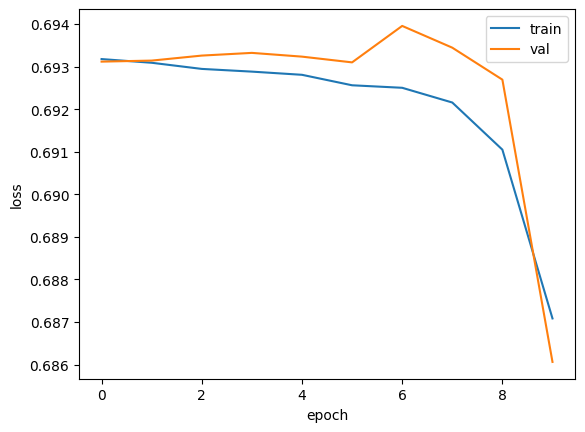

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history_model1.history['loss'])
plt.plot(history_model1.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

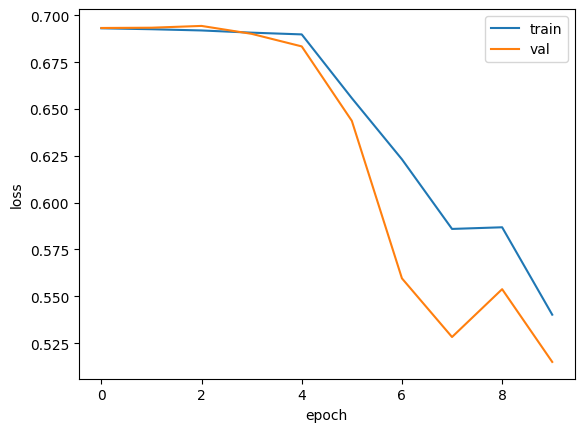

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history_model4.history['loss'])
plt.plot(history_model4.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [ ]:
test_loss_model1, test_acc_model1 = model1.evaluate(x_test,y_test_one_hot)

782/782 [==============================] - 48s 62ms/step - loss: 0.6881 - acc: 0.5153


In [ ]:
test_loss_model4, test_acc_model4 = model4.evaluate(x_test,y_test_one_hot)

782/782 [==============================] - 48s 62ms/step - loss: 0.5258 - acc: 0.7812


In [ ]:
print('test_acc_model1:', test_acc_model1)
print('test_acc_model4:', test_acc_model4)

test_acc_model1: 0.51528000831604
test_acc_model4: 0.7812399864196777


## 2) GRU
데이터셋은 그대로 사용

In [ ]:
#simple GRU
tf.random.set_seed(SEED)
model5 = models.Sequential()
model5.add(layers.Embedding(max_features+1, 32)) #lstm모델보다 파라미터 수가 적은 것을 확인가능
model5.add(layers.GRU(32))
model5.add(layers.Dense(2, activation = 'softmax'))
model5.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_15 (Embedding)    (None, None, 32)          320032    
                                                                 
 gru_5 (GRU)                 (None, 32)                6336      
                                                                 
 dense_21 (Dense)            (None, 2)                 66        
                                                                 
Total params: 326,434
Trainable params: 326,434
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# stacked GRU
tf.random.set_seed(SEED)
model6 = models.Sequential()
model6.add(layers.Embedding(max_features+1, 32))
model6.add(layers.GRU(32, return_sequences = True))
model6.add(layers.GRU(16))
model6.add(layers.Dense(2, activation = 'softmax'))
model6.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_16 (Embedding)    (None, None, 32)          320032    
                                                                 
 gru_6 (GRU)                 (None, None, 32)          6336      
                                                                 
 gru_7 (GRU)                 (None, 16)                2400      
                                                                 
 dense_22 (Dense)            (None, 2)                 34        
                                                                 
Total params: 328,802
Trainable params: 328,802
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# bidirectional LSTM
tf.random.set_seed(SEED)
model7 = models.Sequential()
model7.add(layers.Embedding(max_features+1, 32))
model7.add(layers.Bidirectional(layers.GRU(32, return_sequences = True)))
model7.add(layers.GRU(16))
model7.add(layers.Dense(2, activation = 'softmax'))
model7.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_17 (Embedding)    (None, None, 32)          320032    
                                                                 
 bidirectional_4 (Bidirectio  (None, None, 64)         12672     
 nal)                                                            
                                                                 
 gru_9 (GRU)                 (None, 16)                3936      
                                                                 
 dense_23 (Dense)            (None, 2)                 34        
                                                                 
Total params: 336,674
Trainable params: 336,674
Non-trainable params: 0
_________________________________________________________________


** complie및 학습과정은 lstm과 동일 **

In [ ]:
# model1과의 비교를 위해 simpleGRU 모델인 model5에 대해 학습
from tensorflow.keras.optimizers import RMSprop
model5.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['acc'])

In [ ]:
history_model5 = model5.fit(x_train, y_train_one_hot, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 69s 418ms/step - loss: 0.6931 - acc: 0.5021 - val_loss: 0.6931 - val_acc: 0.5042
Epoch 2/10
157/157 [==============================] - 66s 419ms/step - loss: 0.6928 - acc: 0.5035 - val_loss: 0.6931 - val_acc: 0.5040
Epoch 3/10
157/157 [==============================] - 69s 440ms/step - loss: 0.6924 - acc: 0.5048 - val_loss: 0.6932 - val_acc: 0.5044
Epoch 4/10
157/157 [==============================] - 70s 449ms/step - loss: 0.6919 - acc: 0.5074 - val_loss: 0.6932 - val_acc: 0.4944
Epoch 5/10
157/157 [==============================] - 66s 420ms/step - loss: 0.6913 - acc: 0.5038 - val_loss: 0.6928 - val_acc: 0.5054
Epoch 6/10
157/157 [==============================] - 66s 417ms/step - loss: 0.6901 - acc: 0.5105 - val_loss: 0.6922 - val_acc: 0.5082
Epoch 7/10
157/157 [==============================] - 66s 420ms/step - loss: 0.6886 - acc: 0.5055 - val_loss: 0.6951 - val_acc: 0.4994
Epoch 8/10
157/157 [==============================] - 6

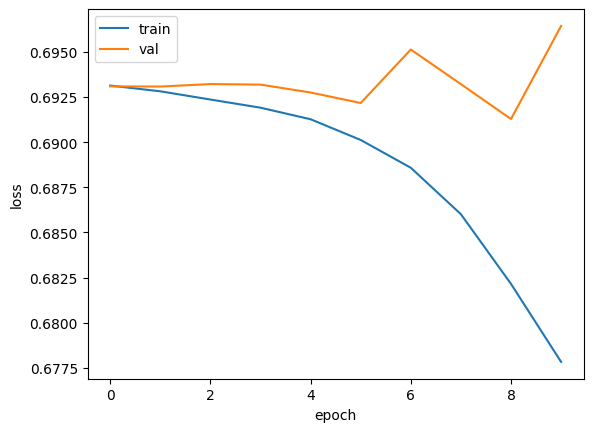

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history_model5.history['loss'])
plt.plot(history_model5.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [ ]:
test_loss_model5, test_acc_model5 = model5.evaluate(x_test,y_test_one_hot)

782/782 [==============================] - 38s 49ms/step - loss: 0.6963 - acc: 0.5068


In [ ]:
# 비교_진짜최종.ipynb
print('test_acc_model1:', test_acc_model1)
print('test_acc_model4:', test_acc_model4)
print('test_acc_model5:', test_acc_model5)

test_acc_model1: 0.51528000831604
test_acc_model4: 0.7812399864196777
test_acc_model5: 0.5068399906158447
